## Solutions to mini-exercises

## Mini-assignment
* Construct a function that given two points $(x_1, y_1), (x_2, y_2)$ on a line computes the slope $a$ of line
$$ y = ax + b$$
given by
$$ a = \frac{y_2- y_1}{x_2 - x_1}$$

In [1]:
def slope(x1, y1, x2, y2):
    """
    Computes the slope of the line passing through (x1,y1) and (x2,y2)
    """
    a = (y2-y1)/(x2-x1)
    return a

## Mini-assignment
* Construct a function named KtoC that converts from degrees Kelvin to Celcius
$$ C = K - 273.15 \quad \text{for} \quad C\geq - 273.15$$
The function should returns None if C < -273.15

In [2]:
def KtoC(K):
    """
    Convert from Kelvin to Celcius.
    """
    C = K - 273.15
    if C < -273.15:
        return None
    else:
        return C

### Mini-assignment
1. Compute the sum of the integers 1 ... 100 based on a list/for-loop/list comprehension (use build-in function sum)
2. Compute the sum of the integers 1 ... 100 using the partial-sum formula
3. Verify by comparing the two methods
$$ \sum_{k=1}^n k = 1 + 2 + \cdots + (n-1) + n = \frac{n(n+1)}{2}$$

In [3]:
n = 100
sum1 = sum([i for i in range(1, n+1)])
sum2 = sum(range(1, n+1))
sum3 = n*(n+1)//2

In [4]:
print(sum1, sum2, sum3)

5050 5050 5050


### Mini-assignment
* Modify the time series
$$(\text{Spring}, 4 ), (\text{Summer}, 2 ), (\text{Autumn}, 7), (\text{Winter}, 8)$$
such that all data is increased by $10$%

In [5]:
import pandas as pd
a = pd.Series([4, 2, 7, 8], index=['Spring', 'Summer', 'Autumn', 'Winter'])

In [6]:
a

Spring    4
Summer    2
Autumn    7
Winter    8
dtype: int64

In [7]:
a *= 1.10

In [8]:
a

Spring    4.4
Summer    2.2
Autumn    7.7
Winter    8.8
dtype: float64

## Mini-assignment
* Give all with a compensation less than 50000 a raise of 1000 (Hint: use loc)

In [9]:
data = [['Henrik Pedersen', 42, 'Associate Professor'], 
        ['Susanne Smed', 49, 'Professor'], 
        ['Kirstine Bak', 27, 'ph.d.-student'],
        ['Hans Hansen', 55, 'Professor']]
a = pd.DataFrame(data, columns=['Name', 'Age', 'Category'])

In [10]:
a['Compensation'] = [44000, 66000, 30000, 65000]

In [11]:
a.loc[a['Compensation'] < 50000, 'Compensation'] += 1000

In [12]:
a

,Name,Age,Category,Compensation
0,Henrik Pedersen,42,Associate Professor,45000
1,Susanne Smed,49,Professor,66000
2,Kirstine Bak,27,ph.d.-student,31000
3,Hans Hansen,55,Professor,65000


## Mini-assignment
1. Compute the mean compensation with values: a['Compensation'] = [44000, 66000, 30000, 65000]
2. Update compensation: a['Compensation'] *= pd.Series([1.02, 1.02, 1.02])
3. Compute mean compensation - is it increased by 2% ?
4. Update NA values using a.fillna(0)
5. Compute mean compensation - what do you observe? - why?

In [13]:
a['Compensation'] = [44000, 66000, 30000, 65000]

In [14]:
a['Compensation'].mean()

51250.0

In [15]:
a['Compensation'] *= pd.Series([1.02, 1.02, 1.02])

In [16]:
a

,Name,Age,Category,Compensation
0,Henrik Pedersen,42,Associate Professor,44880.0
1,Susanne Smed,49,Professor,67320.0
2,Kirstine Bak,27,ph.d.-student,30600.0
3,Hans Hansen,55,Professor,NaN


In [17]:
a['Compensation'].mean()

47600.0

In [18]:
a.fillna(0, inplace=True)

In [19]:
a

,Name,Age,Category,Compensation
0,Henrik Pedersen,42,Associate Professor,44880.0
1,Susanne Smed,49,Professor,67320.0
2,Kirstine Bak,27,ph.d.-student,30600.0
3,Hans Hansen,55,Professor,0.0


In [20]:
a['Compensation'].mean()

35700.0

## Mini-assignment
* Compute the min, median and max statistics for level Category

In [21]:
data = [['Henrik Pedersen', 42, 44000, 'Associate Professor', 'Senior'], 
        ['Susanne Smed', 49, 66000, 'Professor', 'Senior'], 
        ['Kirstine Bak', 27, 30000, 'ph.d.-student', 'Junior'],
        ['Hans Hansen', 55, 65000, 'Professor', 'Senior']]
a = pd.DataFrame([d[:3] for d in data], columns=['Name', 'Age', 'Compensation'], 
                  index=[[d[4] for d in data], [d[3] for d in data]])
a.index.names = ['Seniority', 'Category']

In [22]:
a

Name  Age  Compensation
Seniority Category                                               
Senior    Associate Professor  Henrik Pedersen   42         44000
          Professor               Susanne Smed   49         66000
Junior    ph.d.-student           Kirstine Bak   27         30000
Senior    Professor                Hans Hansen   55         65000

In [23]:
a.mean(level='Category')

,Age,Compensation
Category,,
Associate Professor,42,44000
Professor,52,65500
ph.d.-student,27,30000


In [24]:
a.min(level='Category')

,Name,Age,Compensation
Category,,,
Associate Professor,Henrik Pedersen,42,44000
Professor,Hans Hansen,49,65000
ph.d.-student,Kirstine Bak,27,30000


In [25]:
a.max(level='Category')

,Name,Age,Compensation
Category,,,
Associate Professor,Henrik Pedersen,42,44000
Professor,Susanne Smed,55,66000
ph.d.-student,Kirstine Bak,27,30000


In [26]:
a.median(level='Category')

,Age,Compensation
Category,,
Associate Professor,42,44000
Professor,52,65500
ph.d.-student,27,30000


## Mini-assignment
* Adding rows and columns via merging of the below data frames
* Try both outer and inner: what do you observe? why?

In [27]:
data1 = [['Henrik Pedersen', 42, 'Senior'], 
        ['Susanne Smed', 49, 'Senior'],
        ['Kirstine Bak', 27, 'Junior']]
df1 = pd.DataFrame(data1, columns=['Name', 'Age', 'Level'])
data2 = [['Kirstine Bak', 27, 30000, 'Junior'],
        ['Hans Hansen', 55, 65000, 'Senior']]
df2 = pd.DataFrame(data2, columns=['Name', 'Age', 'Compensation', 'Level'])

In [28]:
df = pd.merge(df1, df2, how='outer')

In [29]:
df

,Name,Age,Level,Compensation
0,Henrik Pedersen,42,Senior,NaN
1,Susanne Smed,49,Senior,NaN
2,Kirstine Bak,27,Junior,30000.0
3,Hans Hansen,55,Senior,65000.0


In [30]:
df = pd.merge(df1, df2, how='inner')

In [31]:
df

,Name,Age,Level,Compensation
0,Kirstine Bak,27,Junior,30000


In [32]:
import plotnine as pn
df = pd.read_csv('../data/dst_education_2017.csv')
year = df['TID'][0]

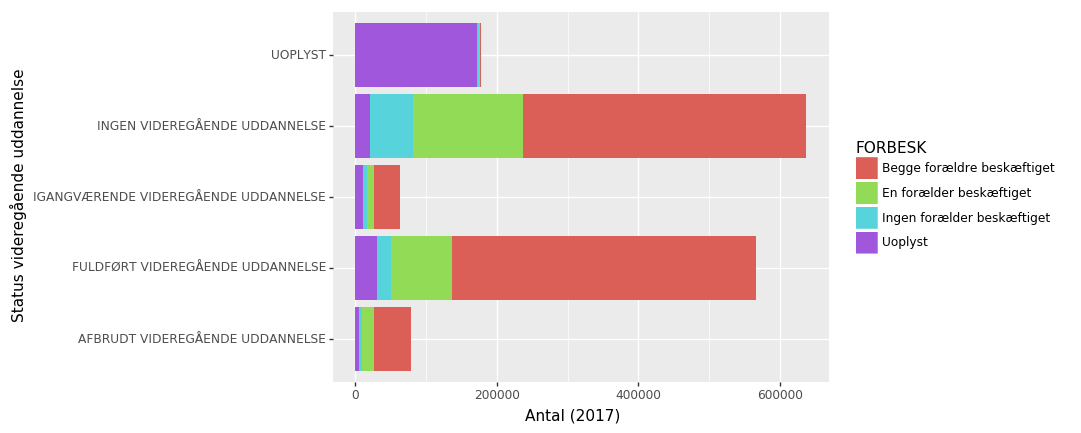

<ggplot: (-9223363259825703536)>

In [33]:
# Flipping factors
(pn.ggplot(df)
+ pn.aes(x = 'STATUSVID', y='INDHOLD', fill='FORBESK')
+ pn.geom_col()
+ pn.labs(x='Status videregående uddannelse', y='Antal ({})'.format(year))
+ pn.coords.coord_flip()
)

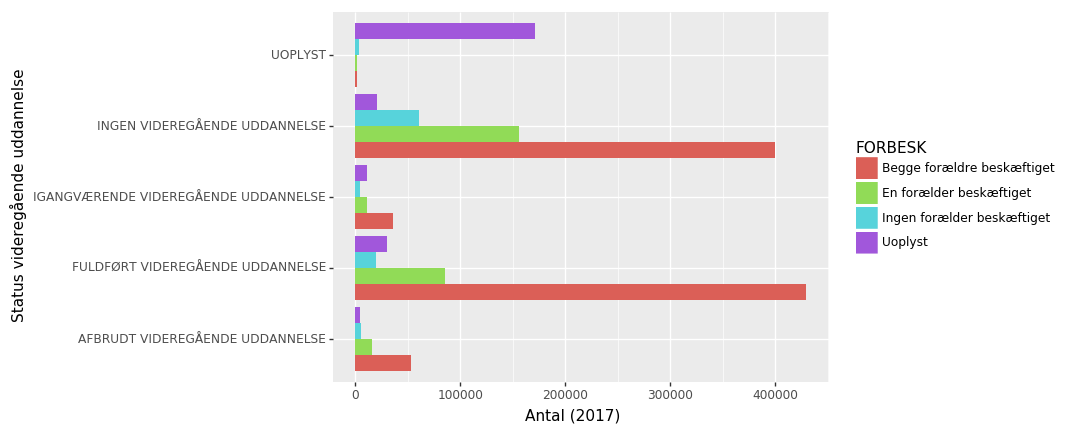

<ggplot: (-9223363259825714786)>

In [34]:
# dodge
(pn.ggplot(df)
+ pn.aes(x = 'STATUSVID', y='INDHOLD', fill='FORBESK')
+ pn.geom_col(position='dodge')
+ pn.labs(x='Status videregående uddannelse', y='Antal ({})'.format(year))
+ pn.coords.coord_flip()
)

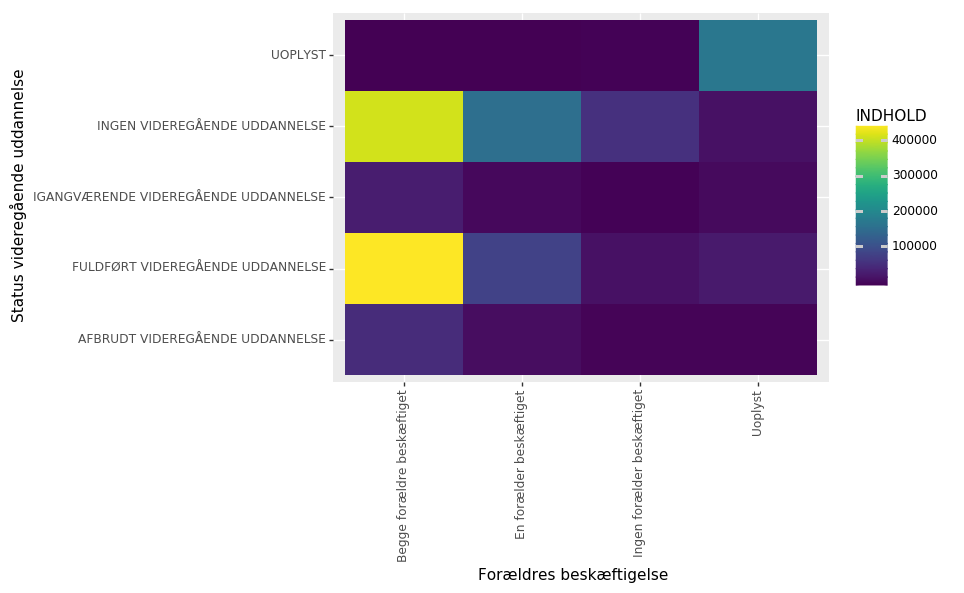

<ggplot: (-9223363259826050865)>

In [35]:
# Tile
(pn.ggplot(df)
+ pn.aes(x = 'FORBESK', y='STATUSVID', fill='INDHOLD')
+ pn.geom_tile()
+ pn.labs(x='Forældres beskæftigelse', y='Status videregående uddannelse')
+ pn.theme(axis_text_x=pn.element_text(angle=90))
)

In [36]:
df = pd.read_csv('../data/b_survey_folketinget_2018.csv', index_col=0)
df['datetime'] = pd.to_datetime(df['datetime'])

In [37]:
parties = ['Unknown', 'A', 'B', 'C', 'D', 'F', 'I', 'K', 'O', 'V', 'Å', 'Ø']
dftd = df.melt(id_vars=['datetime'], value_vars=parties, var_name='parties', value_name='percent')

/home/tlj/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 68 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


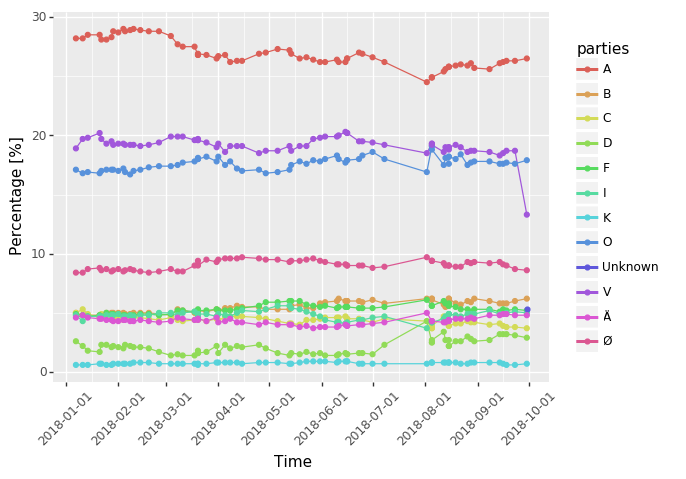

<ggplot: (-9223363259826051047)>

In [38]:
(pn.ggplot(dftd) 
 + pn.aes(x='datetime', y='percent', color='parties') 
 + pn.geom_line() 
 + pn.geom_point() 
 + pn.theme(axis_text_x=pn.element_text(angle=45)) 
 + pn.labs(x='Time', y='Percentage [%]')
)

## Mine-exercise
* Try make a visualization for a single year
* Think basics: what data types do I have? what aestetics can be used?

In [111]:
df = pd.read_csv('../data/aarhus_city_council_top15_tf_idf.csv', index_col=0)
# max idf
import math
V = len(df['year'].unique())
max_idf = math.log(V/1)
print(max_idf)

2.3978952727983707


In [112]:
df.set_index('year', inplace=True)

In [113]:
year = 1938

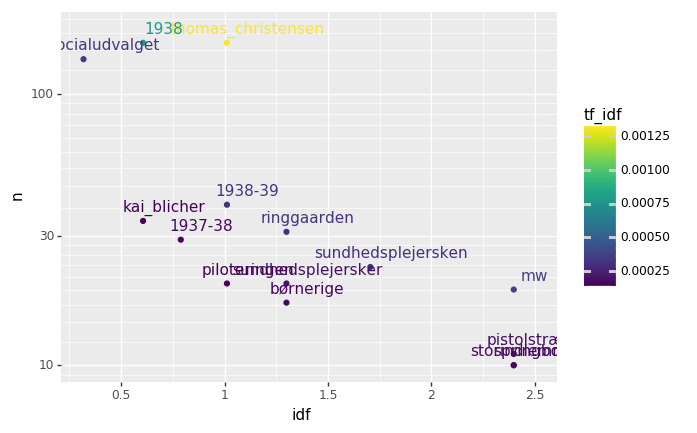

<ggplot: (8777028682949)>

In [115]:
(pn.ggplot(df.loc[year]) +
  pn.aes(x='idf', y='n', label='word', color='tf_idf') +
  pn.geom_point() + 
  pn.geom_text(nudge_x=0.1, nudge_y=0.05) +
  pn.scales.scale_y_log10()
  )

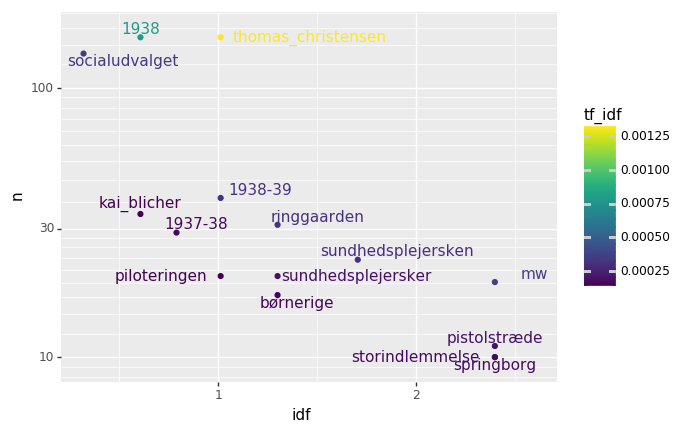

<ggplot: (-9223363259828313845)>

In [117]:
# Manuel nodge for year = 1938
delta_x = [0.45,  0, 0.2 , 0.2  ,  0.2,  0.2,  0.2,    0, 0.4,    0, -0.4,  0.1,  0.1,   0, -0.3]
delta_y = [0, 0.03, 0.03, -0.03, 0.03, 0.03, 0.03, 0.03, 0  ,-0.03, 0   , 0.03,-0.03,0.04, 0]

(pn.ggplot(df.loc[year]) +
  pn.aes(x='idf', y='n', label='word', color='tf_idf') +
  pn.geom_point() + 
  pn.geom_text(nudge_x=delta_x, nudge_y=delta_y) +
  pn.scales.scale_y_log10()
  )

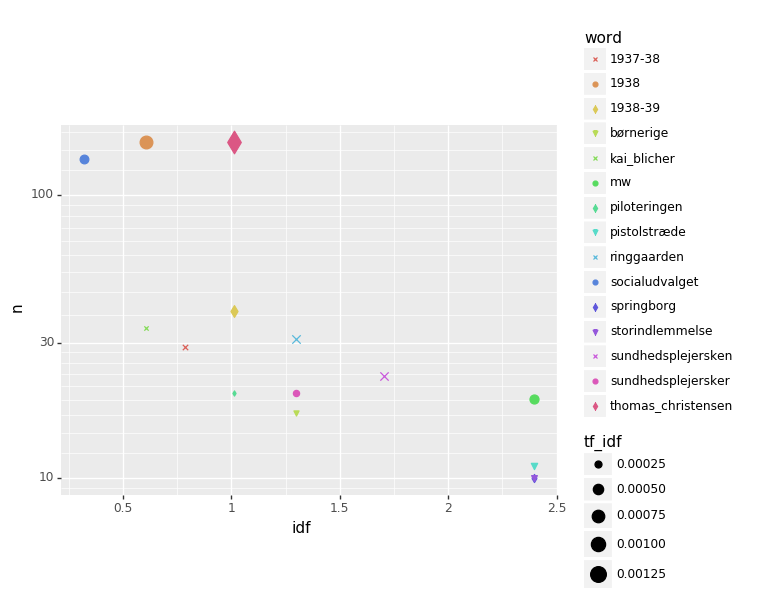

<ggplot: (8777028682823)>

In [118]:
(pn.ggplot(df.loc[year])
  + pn.aes(x='idf', y='n', color='word', size='tf_idf', shape='word')
  + pn.scales.scale_shape_manual(values=['x', 'o', 'd', 'v','x', 'o', 'd', 'v','x', 'o', 'd', 'v','x', 'o', 'd', 'v'])
  + pn.geom_point()
  + pn.scales.scale_y_log10()
  )